<a href="https://colab.research.google.com/github/Ger-oc/XAi/blob/main/Assignment_2_19192118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2024/5

### CS6462 Assignment 2 - Bayesian Networks, ML with Python

### Instructor: Emil Vassev
March 13th, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">TODO: Gerard</span>
### Student Surname: <span style="color:red">TODO: O Connell</span>
### Student ID: <span style="color:red">TODO: 19192118</span>
### Date of Final Submission: <span style="color:red">TODO: 06/04/2025</span>
***

# Task #1: Bayesian Networks (50%)

In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “**Notebook Lesson: Building Bayesian Networks with Python**”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, moderate or active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (10%)

### Step 1.1. Describe the problem (2%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

We are modeling a Bayesian Network based on a real-life academic scenario. The goal is to capture the relationships between various factors that influence a student's performance and the subsequent quality of a recommendation letter. The student's grade depends on three key factors: their intelligence which can be high or low, the difficulty of the module easy or hard, and their health status healthy or sick. These three variables directly impact the student's final grade, which can be A, B, or C.

After completing the module, the student requests a recommendation letter from the professor. However, the professor only considers the student's grade and their forum activity when deciding the strength of the recommendation, which can be either strong or weak. Therefore, the recommendation letter's quality is probabilistically dependent on both the grade and the level of forum activity. This network of dependencies forms the basis for our Bayesian Network model.

<span style="color:red">TODO: your description goes here</span>

In [1]:
!pip install pgmpy


### Step 1.2. Draw and show the DAG (2%)

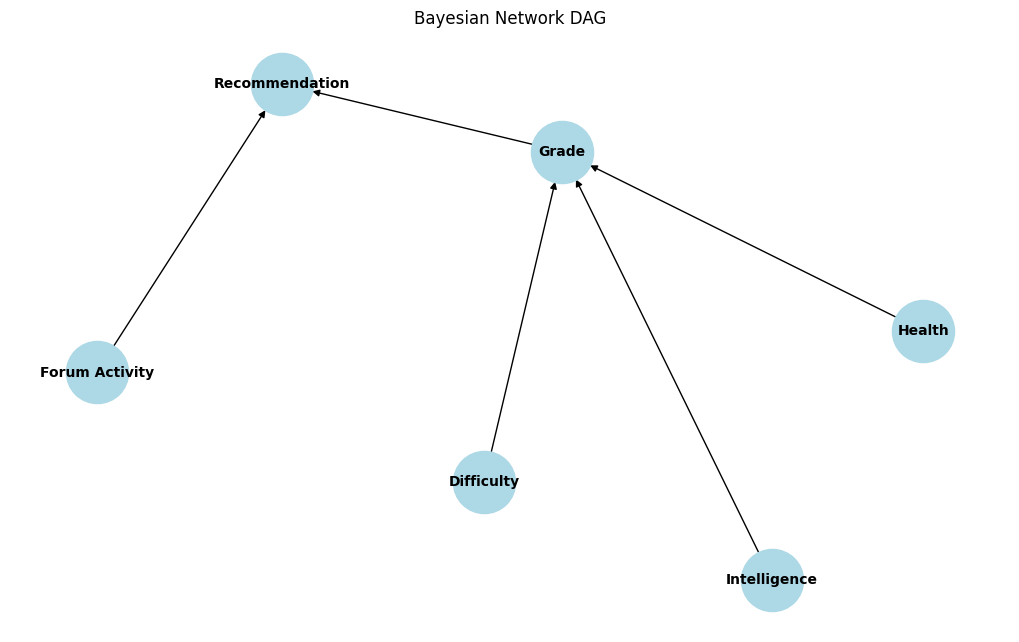

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ("Intelligence", "Grade"),
    ("Difficulty", "Grade"),
    ("Health", "Grade"),
    ("Grade", "Recommendation"),
    ("Forum Activity", "Recommendation")
])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Bayesian Network DAG")
plt.show()

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (5%)

In [3]:
from pgmpy.models import DiscreteBayesianNetwork

model = DiscreteBayesianNetwork([
    ("Intelligence", "Grade"),
    ("Difficulty", "Grade"),
    ("Health", "Grade"),
    ("Grade", "Recommendation"),
    ("Forum Activity", "Recommendation")
])


### Step 1.4. Show the DAG of the Bayesian Network (1%)

In [4]:
model.nodes()
model.edges()


OutEdgeView([('Intelligence', 'Grade'), ('Grade', 'Recommendation'), ('Difficulty', 'Grade'), ('Health', 'Grade'), ('Forum Activity', 'Recommendation')])

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (25%)

### Step 2.1: Build the probability distribution tables with TabularCPD (22%)

In [5]:
from pgmpy.factors.discrete import TabularCPD

cpd_intelligence = TabularCPD(
    variable='Intelligence', variable_card=2,
    values=[[0.7], [0.3]],
    state_names={'Intelligence': ['High', 'Low']}
)

cpd_difficulty = TabularCPD(
    variable='Difficulty', variable_card=2,
    values=[[0.6], [0.4]],
    state_names={'Difficulty': ['Easy', 'Hard']}
)

cpd_health = TabularCPD(
    variable='Health', variable_card=2,
    values=[[0.8], [0.2]],
    state_names={'Health': ['Healthy', 'Sick']}
)

cpd_grade = TabularCPD(
    variable='Grade', variable_card=3,
    values=[
        [0.9, 0.7, 0.6, 0.6, 0.7, 0.5, 0.8, 0.5],
        [0.08, 0.2, 0.3, 0.3, 0.2, 0.3, 0.15, 0.3],
        [0.02, 0.1, 0.1, 0.1, 0.1, 0.2, 0.05, 0.2]
    ],
    evidence=['Intelligence', 'Difficulty', 'Health'],
    evidence_card=[2, 2, 2],
    state_names={
        'Grade': ['A', 'B', 'C'],
        'Intelligence': ['High', 'Low'],
        'Difficulty': ['Easy', 'Hard'],
        'Health': ['Healthy', 'Sick']
    }
)

cpd_forum = TabularCPD(
    variable='Forum Activity', variable_card=3,
    values=[[0.3], [0.4], [0.3]],
    state_names={'Forum Activity': ['Not Active', 'Moderate', 'Active']}
)

cpd_recommendation = TabularCPD(
    variable='Recommendation', variable_card=2,
    values=[
        [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    ],
    evidence=['Grade', 'Forum Activity'],
    evidence_card=[3, 3],
    state_names={
        'Recommendation': ['Strong', 'Weak'],
        'Grade': ['A', 'B', 'C'],
        'Forum Activity': ['Not Active', 'Moderate', 'Active']
    }
)


### Step 2.2: Associate the distribution models with the network structure (2%)

In [6]:
model.add_cpds(cpd_intelligence, cpd_difficulty, cpd_health, cpd_grade, cpd_forum, cpd_recommendation)


### Step 2.3: Check the model (1%)

In [7]:
model.check_model()

True

## Step 3: Inference with the Bayesian Network (15%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (5%)

In [8]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(variables=['Grade'], evidence={'Recommendation': 'Strong'})
print(posterior)



+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(A) |       0.8436 |
+----------+--------------+
| Grade(B) |       0.1352 |
+----------+--------------+
| Grade(C) |       0.0213 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter (no evidence) (5%)

In [9]:
prior = infer.query(variables=['Recommendation'])
print(prior)


+------------------------+-----------------------+
| Recommendation         |   phi(Recommendation) |
+========================+=======================+
| Recommendation(Strong) |                0.6987 |
+------------------------+-----------------------+
| Recommendation(Weak)   |                0.3013 |
+------------------------+-----------------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (5%)

In [10]:
posterior2 = infer.query(variables=['Recommendation'], evidence={'Forum Activity': 'Not Active'})
print(posterior2)

+------------------------+-----------------------+
| Recommendation         |   phi(Recommendation) |
+========================+=======================+
| Recommendation(Strong) |                0.7987 |
+------------------------+-----------------------+
| Recommendation(Weak)   |                0.2013 |
+------------------------+-----------------------+


# Task #2: Machine Learning with Python (50%)

In this task, you are asked to follow the ML process to:

* preprocess a provided dataset, so it will become suitable for ML operations;
* select an appropriate ML model, so it will cope with the specifics of data and ML tasks;
* train the selected ML model on the preprocessed dataset;
* test the selected ML model on the preprocessed dataset.

Please, consult the "**Notebook Lesson: Machine Learning with Python**" for the specifics of the different ML models, the Data Preprocessing staeps and the specifics of Model Training and Testing.

## The Dataset
The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed.

The provided dataset can be loaded as following:

In [11]:
# For use offline only, uncomment if needed

#!pip install wget

#import wget
#wget.download(url_dataset, 'trade_combined.csv')

In [12]:
import pandas as pd

url_dataset = "https://raw.githubusercontent.com/evassev/ET5003_SEM1_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


## Target: In this task you are asked to predict the  <span style="color:red">Bond Price</span>.

## Note: In the following steps use the dataframe object <span style="color:red">df</span>.  

## Here are the steps you need to follow:

## Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model.  (5%)

<span style="color:red">TODO: your rationale goes here</span>

The task is to predict the Bond Price, which is a continuous numerical value, this is a Supervised Regression problem. In supervised learning, we use labeled data to train the model — and in this case, the label is the bond price. Regression models are specifically designed to predict continuous outcomes, as opposed to classification models which predict categories or unsupervised models which find structure in unlabeled data.

## Step 2: Data Preprocessing.  (35%)

### Step 2.1: Specifics of the dataset.  (5%)
<span style="color:red">
    TODO: Show the specifics of the dataset in terms of:
    <ul>
    <li>shape</li>
    <li>columns (features)</li>
    <li>data types</li>
    <li>statistics for the 'Price' feature</li>
    <li>plot the 'Price' feature</li>
    </ul>    
</span>

Shape: (20000, 27)

Columns:
 ['NoRelatedSym', 'Symbol', 'SymbolSfx', 'SecurityID', 'SecurityIDSource', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'OrderQty', 'SettlDate', 'Currency', 'OrdType', 'TransactTime', 'Price', 'PriceType', 'Yield', 'NoPartIDs', 'PartyID', 'DealerID', 'DealerTraderID', 'CustomerTraderID', 'CustomerID', 'PartyIDSource', 'PartyRole', 'DealerCount', 'OrdSubType']

Data Types:
 NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID               int64
DealerID              int64
DealerTraderID      float64

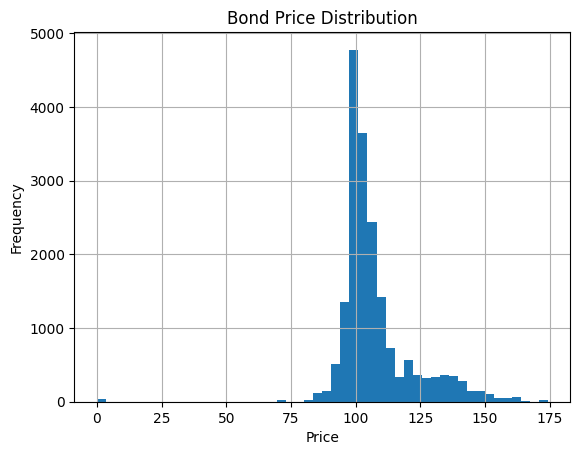

In [14]:
import matplotlib.pyplot as plt

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\n'Price' Feature Stats:\n", df["Price"].describe())

# Plotting the 'Price' distribution
df["Price"].hist(bins=50)
plt.title("Bond Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


### Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the features with unique values for each row in the dataset.</li>
    <li>Remove the features with unique values for each row in the dataset.</li>
    </ul>    
</span>

In [15]:
# Show features with all unique values
unique_row_features = [col for col in df.columns if df[col].nunique() == len(df)]
print("Unique-per-row features:", unique_row_features)

# Drop
df = df.drop(columns=unique_row_features)


Unique-per-row features: []


### Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the features with one unique value for the entire dataset.</li>
    <li>Remove the features with one unique value for the entire dataset.</li>
    </ul>    
</span>

In [16]:
# Show features with only one unique value across all rows
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("One-value features:", constant_features)

# Drop
df = df.drop(columns=constant_features)


One-value features: ['NoRelatedSym', 'SymbolSfx', 'SecurityIDSource', 'Currency', 'OrdType', 'PriceType', 'NoPartIDs', 'PartyID', 'PartyIDSource', 'PartyRole', 'OrdSubType']


### Step 2.4: Data Cleaning: Remove records with null (NAN) values. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the number of null values per feature.</li>
    <li>For any feature, remove the rows containg a null value.</li>
    </ul>    
</span>

In [17]:
# Show missing values per column
print("Missing values:\n", df.isnull().sum())

# Drop rows with any nulls
df = df.dropna()
print("New shape after dropping nulls:", df.shape)


Missing values:
 Symbol                  0
SecurityID          13959
SecurityType            0
MaturityDate            0
IssueDate               0
Side                    0
OrderQty                0
SettlDate               0
TransactTime            0
Price                1308
Yield                1297
DealerID                0
DealerTraderID       1055
CustomerTraderID        0
CustomerID              0
DealerCount             0
dtype: int64
New shape after dropping nulls: (5685, 16)


### Step 2.5: Data Transformation: Convert all non-numeric features to numeric. (15%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show all non-numeric features.</li>
    <li>Convert the non-numeric features to numeric.</li>
    </ul>    
</span>

In [18]:
# Show non-numeric features
non_numeric_features = df.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric features:", non_numeric_features)

# Convert to numeric using one-hot encoding
df = pd.get_dummies(df, columns=non_numeric_features)


Non-numeric features: ['Symbol', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'SettlDate', 'TransactTime']


## Step 3: Model Training and Testing.  (10%)

In [19]:
df.shape

(5685, 2548)

In [20]:
df.head(10)

,SecurityID,OrderQty,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount,Symbol_013051CZ8,...,TransactTime_21:48:21,TransactTime_21:48:41,TransactTime_21:50:04,TransactTime_21:52:51,TransactTime_21:54:57,TransactTime_21:55:51,TransactTime_21:56:30,TransactTime_21:57:33,TransactTime_21:57:36,TransactTime_21:57:41
6204,1657312.0,1000000,111.140,2.243,334,113683.0,11570,454,4,False,...,False,False,False,False,False,False,False,False,False,False
6205,1657312.0,1000000,111.220,2.240,335,114347.0,11570,454,4,False,...,False,False,False,False,False,False,False,False,False,False
6206,1657313.0,5000000,99.760,1.881,323,118599.0,6753,204,1,False,...,False,False,False,False,False,False,False,False,False,False
6207,1657317.0,1250000,111.198,2.241,321,7177.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6208,1657317.0,1250000,111.130,2.244,327,7687.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6209,1657317.0,1250000,111.190,2.241,334,113683.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6210,1657317.0,1250000,111.300,2.236,337,5168.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6211,1657324.0,1250000,111.180,2.241,321,7177.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6212,1657324.0,1250000,111.130,2.244,327,7687.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6213,1657324.0,1250000,111.150,2.243,334,113683.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False


### Step 3.1: Select and Import a ML Algorithm. (2%)
<span style="color:red">
    TODO: Based on your rationale provided in Step 1, import one of the following algorithms:
    <ul>
    <li>for Supervised Classification ML use <b>'from sklearn.ensemble import RandomForestClassifier'</b></li>
    <li>for Supervised Regression ML use <b>'from sklearn.ensemble import RandomForestRegressor'</b></li>
    <li>for Unsupervised ML use <b>'from sklearn.cluster import KMeans'</b></li>
    </ul>    
</span>

In [21]:
# For regression tasks, I use RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


### Step 3.2: Train the ML Model. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>from the preprocessed dataset, extract 𝑋 - a dataset of all the features but 'Price'</li>
    <li>from the preprocessed dataset, extract 𝑌  - vector that contains all the values of 'Price'</li>
    <li>slice the dataset: 80% for training and 20% for testing</li>
    <li>create an instance of the selected ML algorithm and train</li>
    </ul>    
</span>

In [22]:
from sklearn import metrics
X = df.drop(columns=['Price'])
y = df['Price']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


### Step 3.3: Test the ML Model. (3%)
<span style="color:red">
    TODO:
    <ul>
    <li>use the testing part of the dataset to predic the Bond Prices</li>
    <li>compute and show the prediction score</li>
    </ul>    
</span>

In [23]:
import numpy as np
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("R^2 Score:", model.score(X_test, y_test))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R^2 Score: 0.9701334173096842
MAE: 0.8578230958663202
MSE: 6.619246941485486
RMSE: 2.572789719640042


In [24]:
print("Predicted Bond Prices:")
print(y_pred)


Predicted Bond Prices:
[101.82624  98.6116   98.59015 ... 104.96191 113.08589 111.1345 ]


In [25]:
# Show predicted vs actual prices
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

print(comparison.head(10))  # Show first 10 rows


   Actual Price  Predicted Price
0       101.747        101.82624
1        98.210         98.61160
2        98.590         98.59015
3       112.816        110.96124
4        92.300         92.30976
5       102.291        101.98311
6       110.657        109.24067
7       108.605        108.60215
8       101.738        103.67601
9       136.400        136.40482
